# Inference

Basically, this is using the trained model for predictions.<br/>
To do this, we don't need a GPU. We can do this in a CPU.

Basically, that's the idea.
You train a model on a powerful device, then put that model in a less powerful model.<br/>
May be in the edge(Rasberry Pi) or inside a Web app.

## Setting Up
This is how we install fastai and setup our notebook

In [1]:
!pip install fastai2
!git clone https://github.com/arunoda/deeplearning.git
%cd 'deeplearning'

     |████████████████████████████████| 194kB 3.5MB/s 
Cloning into 'deeplearning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 38 (delta 1), reused 4 (delta 1), pack-reused 33
Unpacking objects: 100% (38/38), done.
/content/deeplearning


In [0]:
from fastai2.vision.all import *
from ipywidgets import widgets

## Connecting to Google Drive

Let's connect to Google Drive. So, we can load the our trained model.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
data_dir = Path("/content/drive/My Drive/dl-mantra")
data_dir.ls()

(#1) [Path('/content/drive/My Drive/dl-mantra/cats_and_dogs.pkl')]

## Loading the Model

In [6]:
learn = load_learner(data_dir/"cats_and_dogs.pkl")

AttributeError: ignored

**Hmm. It failed why?**

Oh we need to get our `cat_or_dog` function.

In [0]:
def cat_or_dog(p):
    if p.name[0].isupper():
        return 'cat'
    else:
        return 'dog'

In [0]:
# Let's try to load it again
learn = load_learner(data_dir/"cats_and_dogs.pkl")

## Let's Predict

In [0]:
uploader = widgets.FileUpload()

In [12]:
uploader

FileUpload(value={}, description='Upload')

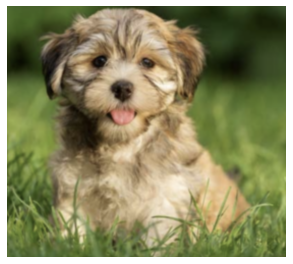

In [13]:
im_uploaded = PILImage.create(uploader.data[0])
show_image(im_uploaded)

In [14]:
learn.predict(im_uploaded)

('dog', tensor(1), tensor([1.4839e-04, 9.9985e-01]))